# Lab-7:
## Mini Project:
## Phase-1: 
#### Submit a python notebook with the preliminary analysis of data and record the objective of the project, data sources, data preparation steps etc. Identify the tech stack for the app.
> Ronan Mark D'souza, 200968256</br>
> Section-A, 64

## Meta Information of the data set used

> ### Meta Data:
>This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
>
>Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.
>All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
>
><pre>            userId,movieId,rating,timestamp</br></pre>
>
> Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:
>
><pre>            movieId,imdbId,tmdbId</br></pre>
>
> Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:
>
><pre>            movieId,title,genres</br></pre>
>
>All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:
>
><pre>            userId,movieId,tag,timestamp</br></pre>
>Genres are a pipe-separated list, and are selected from the following:
>
> * Action
> * Adventure
> * Animation
> * Children's
> * Comedy
> * Crime
> * Documentary
> * Drama
> * Fantasy
> * Film-Noir
> * Horror
> * Musical
> * Mystery
> * Romance
> * Sci-Fi
> * Thriller
> * War
> * Western
> * (no genres listed)
>
><pre><i>Additional Points: </i>
> To grab the poster for the image the following APIs can be used:
> movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.
>
> imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.
>
> tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.
></pre>
>
>
>.

## Tech Stack

#### Libraries used for the project:
- [Streamlit](https://streamlit.io/), for UI
- [Pandas](https://pandas.pydata.org/) and [Numpy](https://numpy.org/), for Data Manipulation
- [Seaborn](https://seaborn.pydata.org/), for visualization
- [Scikit-learn](https://scikit-learn.org/stable/), for Labeling and similarity analysis
- [Matplotlib](https://matplotlib.org/), for visualization
- [SQLite3](https://www.sqlite.org/index.html), for Database

## Preliminary and Exploratory Analysis and Visualization of the dataset

> Importing libraries

In [1077]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
sb.set_theme()
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 12
warnings.filterwarnings('ignore')

> Loading Data Sets

In [1078]:
links =  pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [1079]:
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [1080]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [1081]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [1082]:
tags.head(3)
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

> Dropping 'timestamp' from 'tags.csv' and 'ratings.csv' 

In [1083]:
ratings.drop('timestamp', inplace=True, axis=1)
tags.drop('timestamp', inplace=True, axis=1)

> Merging the Data Sets

In [1084]:
print("Links: {} rows.\nMovies: {} rows.\nRatings: {} rows.\nTags: {} rows.".format(links.shape[0],movies.shape[0],ratings.shape[0],tags.shape[0]))

Links: 9742 rows.
Movies: 9742 rows.
Ratings: 100836 rows.
Tags: 3683 rows.


> Merging 'movies.csv' and 'ratings.csv'

In [1085]:
mov_rat = pd.merge(movies, ratings)
mov_rat.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5


> Adding MultiLabelBinarizer

In [1086]:
mov_rat['genres'] = mov_rat.apply(lambda x: x['genres'].split('|'),axis=1)

In [1087]:
mlb = MultiLabelBinarizer()
trans  = mlb.fit_transform(mov_rat['genres'])
label = pd.DataFrame(data=trans, columns=mlb.classes_)
data = pd.concat([mov_rat, label], axis=1)

In [1088]:
data_gb = data.groupby(['userId','title'])
data = data_gb.first()

In [1089]:
data.drop(columns=['genres','(no genres listed)','IMAX'], inplace=True)
data

movieId  rating  Action  \
userId title                                                           
1      13th Warrior, The (1999)                 2826     4.0       1   
       20 Dates (1998)                          2492     4.0       0   
       Abyss, The (1989)                        1127     4.0       1   
       Adventures of Robin Hood, The (1938)      940     5.0       1   
       Alice in Wonderland (1951)               1032     5.0       0   
...                                              ...     ...     ...   
610    [REC] (2007)                            57274     4.0       0   
       [REC]² (2009)                           74750     3.5       0   
       [REC]³ 3 Génesis (2012)                 97643     3.0       0   
       xXx (2002)                               5507     2.0       1   
       xXx: State of the Union (2005)          33158     1.5       1   

                                             Adventure  Animation  Children  \
userId title                                                                  
1      13th Warrior, The (1999)                      1          0         0   
       20 Dates (1998)                               0          0         0   
       Abyss, The (1989)                             1          0         0   
       Adventures of Robin Hood, The (1938)          1          0         0   
       Alice in Wonderland (1951)                    1          1         1   
...                                                ...        ...       ...   
610    [REC] (2007)                                  0          0         0   
       [REC]² (2009)                                 0          0         0   
       [REC]³ 3 Génesis (2012)                       0          0         0   
       xXx (2002)                                    0          0         0   
       xXx: State of the Union (2005)                0          0         0   

                                             Comedy  Crime  Documentary  \
userId title                                                              
1      13th Warrior, The (1999)                   0      0            0   
       20 Dates (1998)                            1      0            0   
       Abyss, The (1989)                          0      0            0   
       Adventures of Robin Hood, The (1938)       0      0            0   
       Alice in Wonderland (1951)                 0      0            0   
...                                             ...    ...          ...   
610    [REC] (2007)                               0      0            0   
       [REC]² (2009)                              0      0            0   
       [REC]³ 3 Génesis (2012)                    0      0            0   
       xXx (2002)                                 0      1            0   
       xXx: State of the Union (2005)             0      1            0   

                                             Drama  Fantasy  Film-Noir  \
userId title                                                             
1      13th Warrior, The (1999)                  0        1          0   
       20 Dates (1998)                           0        0          0   
       Abyss, The (1989)                         0        0          0   
       Adventures of Robin Hood, The (1938)      0        0          0   
       Alice in Wonderland (1951)                0        1          0   
...                                            ...      ...        ...   
610    [REC] (2007)                              1        0          0   
       [REC]² (2009)                             0        0          0   
       [REC]³ 3 Génesis (2012)                   0        0          0   
       xXx (2002)                                0        0          0   
       xXx: State of the Union (2005)            0        0          0   

                                             Horror  Musical  Mystery  \
userId title                                                        

> User Matrix

In [1091]:
user_mat = pd.pivot_table(data=data, index=['userId'],aggfunc=np.sum)
user_mat = user_mat.drop(columns=['rating','movieId'])
user_mat

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,
1,90,85,29,42,83,45,0,68,47,1,17,22,18,26,40,55,22,7
2,11,3,0,0,7,10,3,17,0,0,1,0,2,1,4,10,1,1
3,14,11,4,5,9,2,0,16,4,0,8,1,1,5,15,7,5,0
4,25,29,6,10,104,27,2,120,19,4,4,16,23,58,12,38,7,10
5,9,8,6,9,15,12,0,25,7,0,1,5,1,11,2,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,151,147,42,49,421,133,5,698,97,8,52,44,91,355,79,199,65,17
607,72,45,6,19,55,27,0,82,21,0,35,5,17,29,36,61,6,2
608,277,181,55,88,355,146,6,280,111,4,97,33,69,106,167,259,19,11


> Cosine Similarity

In [1092]:
cos_mat = pd.DataFrame(cosine_similarity(user_mat,user_mat), columns=np.arange(1,611,1)).set_index(np.arange(1,611,1))
cos_mat

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.000000,0.796561,0.900917,0.791829,0.874717,0.882947,0.973257,0.895902,0.881632,0.770981,...,0.945696,0.887980,0.790557,0.932471,0.875724,0.775636,0.933974,0.957279,0.867639,0.916333
2,0.796561,1.000000,0.786260,0.812972,0.853542,0.847272,0.847116,0.842263,0.905556,0.669139,...,0.832425,0.946358,0.894137,0.889515,0.522756,0.831969,0.899188,0.868797,0.935491,0.901556
3,0.900917,0.786260,1.000000,0.747617,0.799760,0.834564,0.937056,0.808697,0.892695,0.716520,...,0.911039,0.848597,0.799722,0.922802,0.748113,0.779568,0.935565,0.901160,0.876306,0.899748
4,0.791829,0.812972,0.747617,1.000000,0.932128,0.969237,0.820557,0.940558,0.932382,0.939423,...,0.795945,0.900479,0.975736,0.843693,0.694062,0.984220,0.847752,0.868603,0.833812,0.796353
5,0.874717,0.853542,0.799760,0.932128,1.000000,0.959105,0.871639,0.917680,0.912437,0.891333,...,0.894912,0.921107,0.933320,0.901303,0.764963,0.940602,0.882497,0.885095,0.883458,0.833432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.775636,0.831969,0.779568,0.984220,0.940602,0.960751,0.824516,0.919799,0.935627,0.934050,...,0.822628,0.912164,0.988146,0.854638,0.677681,1.000000,0.862457,0.848216,0.868344,0.800103
607,0.933974,0.899188,0.935565,0.847752,0.882497,0.924631,0.961592,0.921698,0.954194,0.783729,...,0.926506,0.959727,0.897721,0.989042,0.757446,0.862457,1.000000,0.972540,0.946760,0.982835
608,0.957279,0.868797,0.901160,0.868603,0.885095,0.937842,0.963188,0.953739,0.946539,0.810645,...,0.902196,0.940848,0.879698,0.972810,0.790880,0.848216,0.972540,1.000000,0.899984,0.969514
609,0.867639,0.935491,0.876306,0.833812,0.883458,0.893415,0.918115,0.894830,0.943721,0.746912,...,0.916490,0.976305,0.901155,0.926677,0.653273,0.868344,0.946760,0.899984,1.000000,0.921106


> Mean ratings of movies

In [1096]:
mean_rat = ratings.groupby('movieId').rating.mean()
num_users = ratings.groupby('movieId').userId.count()
mean_rat_movie_temp = pd.merge(mean_rat, movies, how='inner', on='movieId')
mean_rat_movie = pd.merge(mean_rat_movie_temp, num_users, how='inner', on='movieId')
mean_rat_movie.drop(columns='genres', inplace=True)
mean_rat_movie.rename(columns={'rating':'mean_ratings','userId':'num_users'}, inplace=True)
mean_rat_movie

,movieId,mean_ratings,title,num_users
0,1,3.920930,Toy Story (1995),215
1,2,3.431818,Jumanji (1995),110
2,3,3.259615,Grumpier Old Men (1995),52
3,4,2.357143,Waiting to Exhale (1995),7
4,5,3.071429,Father of the Bride Part II (1995),49
...,...,...,...,...
9719,193581,4.000000,Black Butler: Book of the Atlantic (2017),1
9720,193583,3.500000,No Game No Life: Zero (2017),1
9721,193585,3.500000,Flint (2017),1
9722,193587,3.500000,Bungo Stray Dogs: Dead Apple (2018),1


Text(0, 0.5, 'Popularity')

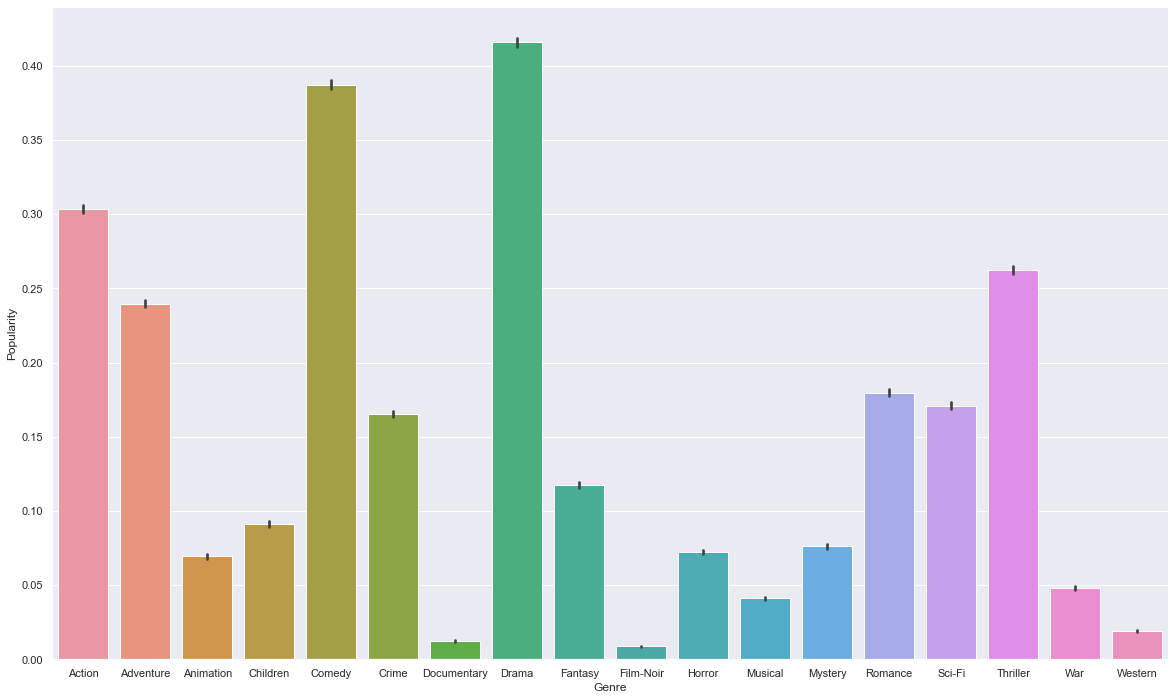

In [1098]:
plot = sb.barplot(data=data.iloc[:,2:20])
plot.set_xlabel('Genre')
plot.set_ylabel('Popularity')

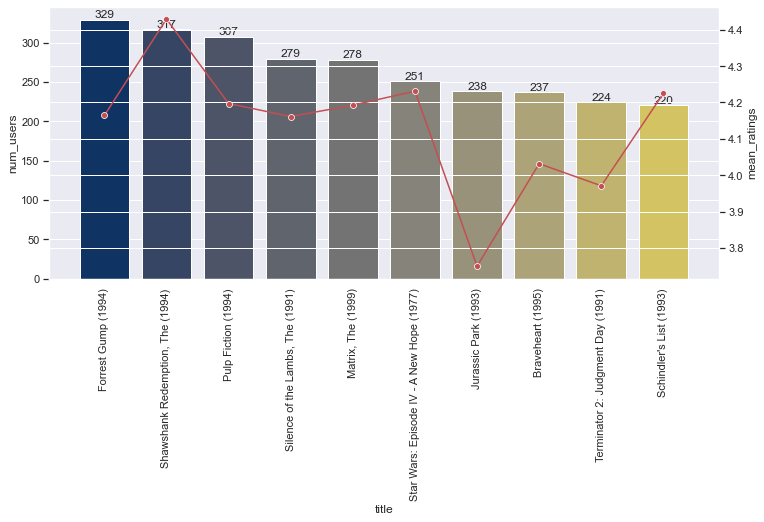

In [1108]:
mov_rat_filter = mean_rat_movie[mean_rat_movie["num_users"]>10] # Including movies which have been watched by more than 10 users.
mov_rat_filter = mov_rat_filter.sort_values(by=['num_users','mean_ratings'],ascending=False) # Sorting values by descending order by users and then rating

x = mov_rat_filter["title"].head(10)
y1 = mov_rat_filter["num_users"].head(10)
y2 = mov_rat_filter["mean_ratings"].head(10)

plt.figure(figsize=(12,5))

ax1 = sb.barplot(x=x,y=y1,palette='cividis')
ax1.bar_label(ax1.containers[0])

ax2 = ax1.twinx()
sb.lineplot(x=x,y=y2,ax=ax2,color='r',marker='o')

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

## Objectives of the project

### The objectives of the project are:
- To recommend movies
- Popularity-Based recommendation
- Content-Based recommendation
- Collaborative Filtering
- To actively update the dataset for new users on the application